In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = SVC(C=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')
auc = roc_auc_score(y_test, pred)
print(f'ROC-AUC Score: {auc}')


[[49 10]
 [ 0 84]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        59
           1       0.89      1.00      0.94        84

    accuracy                           0.93       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.93      0.93       143

ROC-AUC Score: 0.9152542372881356


2) Dataset

In [13]:
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=2,
                           n_clusters_per_class=1,
                           weights=[0.5, 0.5],
                           flip_y=0,
                           random_state=42)

feature_names = [f'feature_{i}' for i in range(1, 11)]
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

X_balanced = data.drop(columns='target')
y_balanced = data['target']

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-1.276758,1.098507,-0.233284,3.673269,-0.156897,1.475733,-0.969051,0.699955,4.351807,-0.873890,1
1,-0.150741,2.069510,1.206587,-0.977449,-0.144611,-0.619636,-0.295027,1.731053,-0.443854,1.751397,1
2,0.038501,1.106842,0.498605,-2.839004,-3.086502,0.753736,1.746154,1.452008,-2.833326,-0.514634,0
3,1.468521,1.004174,0.510276,-0.251417,3.146824,0.877351,-0.300327,-0.073444,0.356724,2.148308,0
4,2.932286,3.761785,0.777972,-2.891083,-1.699752,-0.170747,-3.071151,5.104681,-0.483350,0.404189,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')
auc = roc_auc_score(y_test, pred)
print(f'ROC-AUC Score: {auc}')

[[129   1]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       130
           1       0.99      0.98      0.99       120

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

ROC-AUC Score: 0.987820512820513


3) Dataset

In [28]:
data = pd.read_csv('./data/framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: >

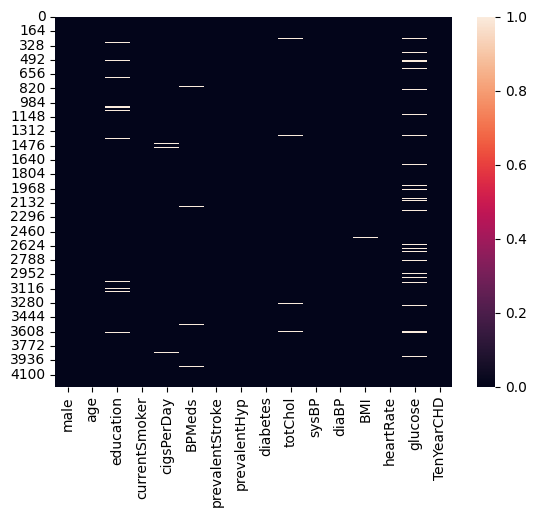

In [29]:
sns.heatmap(data.isnull())

In [30]:
mean_value_education = data['education'].mean() 
mean_value_cigs = data['cigsPerDay'].mean()
mean_value_totChol = data['totChol'].mean()
mean_value_bmi = data['BMI'].mean()
mean_hear_rate = data['heartRate'].mean()

data.drop('education', axis=1, inplace=True)
data['cigsPerDay'] = data['cigsPerDay'].fillna(value=mean_value_cigs)
data['BPMeds'] = data['BPMeds'].fillna(value = 0)
data['totChol'] = data['totChol'].fillna(value=mean_value_totChol)
data['BMI'] = data['BMI'].fillna(value=mean_value_bmi)
data['heartRate'] = data['heartRate'].fillna(value=mean_hear_rate)
data.drop('glucose', axis=1, inplace=True)

In [39]:
X = data[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate']]
y = data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')
auc = roc_auc_score(y_test, pred)
print(f'ROC-AUC Score: {auc}')

[[441 279]
 [ 35  93]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74       720
           1       0.25      0.73      0.37       128

    accuracy                           0.63       848
   macro avg       0.59      0.67      0.55       848
weighted avg       0.82      0.63      0.68       848

ROC-AUC Score: 0.66953125


4) Face detection with SVM

In [40]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [48]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)


param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)


CPU times: user 2min 23s, sys: 20.2 s, total: 2min 43s
Wall time: 28.5 s
{'svc__C': 5, 'svc__gamma': 0.001}


                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



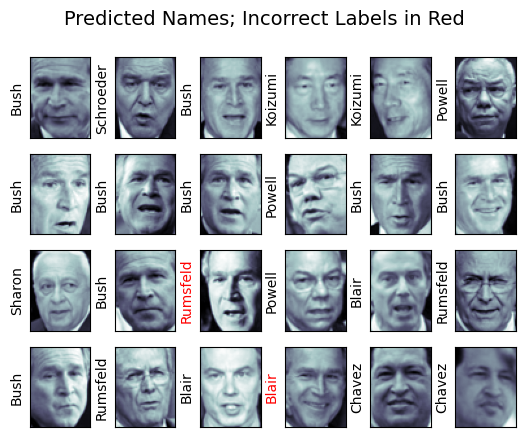

In [51]:
model = grid.best_estimator_
yfit = model.predict(X_test)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))
